In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import attila_utils

In [2]:
pd.read_csv('../../resources/BindingDB/BindingDB_ChEMBL_2021m9-head.tsv', sep='\t')

,BindingDB Reactant_set_id,Ligand SMILES,Ligand InChI,Ligand InChI Key,BindingDB MonomerID,BindingDB Ligand Name,Target Name Assigned by Curator or DataSource,Target Source Organism According to Curator or DataSource,Ki (nM),IC50 (nM),...,UniProt (SwissProt) Recommended Name of Target Chain,UniProt (SwissProt) Entry Name of Target Chain,UniProt (SwissProt) Primary ID of Target Chain,UniProt (SwissProt) Secondary ID(s) of Target Chain,UniProt (SwissProt) Alternative ID(s) of Target Chain,UniProt (TrEMBL) Submitted Name of Target Chain,UniProt (TrEMBL) Entry Name of Target Chain,UniProt (TrEMBL) Primary ID of Target Chain,UniProt (TrEMBL) Secondary ID(s) of Target Chain,UniProt (TrEMBL) Alternative ID(s) of Target Chain
0,50748302,Cc1ccc(Sc2ccc(Sc3nnc[nH]3)nc2C(=O)Nc2ncns2)cn1,InChI=1S/C16H12N8OS3/c1-9-2-3-10(6-17-9)26-11-...,JADPOZIPXGRFTI-UHFFFAOYSA-N,50239050,CHEMBL4079100,Glucokinase/Glucokinase regulatory protein,Homo sapiens,NaN,NaN,...,Hexokinase-4,HXK4_HUMAN,P35557,"A4D2J2,A4D2J3,Q05810",NaN,NaN,NaN,Q53Y25,NaN,NaN
1,50748303,COc1ccc(Sc2ccc(Sc3nncn3C)nc2C(=O)Nc2ncc(SCC(O)...,InChI=1S/C21H18N6O4S4/c1-27-11-23-26-21(27)34-...,MJHNYEFAOUYNSZ-UHFFFAOYSA-N,260374,"US9527838, 2",Glucokinase/Glucokinase regulatory protein,Homo sapiens,NaN,NaN,...,Hexokinase-4,HXK4_HUMAN,P35557,"A4D2J2,A4D2J3,Q05810",NaN,NaN,NaN,Q53Y25,NaN,NaN
2,50748304,COc1ccc(Sc2ccc(Sc3ccccn3)nc2C(=O)Nc2ncc(CCC(O)...,InChI=1S/C24H20N4O4S3/c1-32-15-5-7-16(8-6-15)3...,SZYQPCWDTBUONO-UHFFFAOYSA-N,260387,"US9527838, 15",Glucokinase/Glucokinase regulatory protein,Homo sapiens,NaN,NaN,...,Hexokinase-4,HXK4_HUMAN,P35557,"A4D2J2,A4D2J3,Q05810",NaN,NaN,NaN,Q53Y25,NaN,NaN
3,50748305,COc1ccc(Sc2ccc(Sc3ccccn3)nc2C(=O)Nc2nc(CC(O)=O...,InChI=1S/C23H18N4O4S3/c1-31-15-5-7-16(8-6-15)3...,XWVLMYWQBFKPTP-UHFFFAOYSA-N,260389,"US9527838, 17",Glucokinase/Glucokinase regulatory protein,Homo sapiens,NaN,NaN,...,Hexokinase-4,HXK4_HUMAN,P35557,"A4D2J2,A4D2J3,Q05810",NaN,NaN,NaN,Q53Y25,NaN,NaN
4,50748306,COc1ccc(Sc2ccc(Sc3ccccn3)nc2C(=O)Nc2nc(CC(O)=O...,InChI=1S/C23H17ClN4O4S3/c1-32-13-5-7-14(8-6-13...,LBGJOPLJDBUTRE-UHFFFAOYSA-N,260385,"US9527838, 13",Glucokinase/Glucokinase regulatory protein,Homo sapiens,NaN,NaN,...,Hexokinase-4,HXK4_HUMAN,P35557,"A4D2J2,A4D2J3,Q05810",NaN,NaN,NaN,Q53Y25,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,50748640,Cc1cc(OCCCn2ccc3ccc(OCc4ccccc4C(O)=O)cc23)cc(C...,InChI=1S/C27H26ClNO4/c1-18-14-23(15-19(2)26(18...,LXHWTNSLSUVRLQ-UHFFFAOYSA-N,50239084,CHEMBL4088240,Apoptosis regulator Bcl-2,NaN,1050.0,NaN,...,Apoptosis regulator Bcl-2,BCL2_HUMAN,P10415,"C9JHD5,P10416,Q13842,Q16197",NaN,NaN,NaN,A0A024R2B3,NaN,NaN
95,50748641,Cc1cc(OCCCn2ccc3ccc(OCc4cccc(c4)C(O)=O)cc23)cc...,InChI=1S/C27H26ClNO4/c1-18-13-24(14-19(2)26(18...,WYAHBTJBOXJLSZ-UHFFFAOYSA-N,50239085,CHEMBL4094073,Apoptosis regulator Bcl-2,NaN,1190.0,NaN,...,Apoptosis regulator Bcl-2,BCL2_HUMAN,P10415,"C9JHD5,P10416,Q13842,Q16197",NaN,NaN,NaN,A0A024R2B3,NaN,NaN
96,50748642,Cc1cc(OCCCn2ccc3cc(OCc4ccccc4C(O)=O)ccc23)cc(C...,InChI=1S/C27H26ClNO4/c1-18-14-23(15-19(2)26(18...,XNENLWGUIGBLAZ-UHFFFAOYSA-N,50239086,CHEMBL4105602,Apoptosis regulator Bcl-2,NaN,760.0,NaN,...,Apoptosis regulator Bcl-2,BCL2_HUMAN,P10415,"C9JHD5,P10416,Q13842,Q16197",NaN,NaN,NaN,A0A024R2B3,NaN,NaN
97,50748649,CC(C)(C)c1ccc(OCCCn2ccc3cc(OCc4ccccc4C(O)=O)cc...,"InChI=1S/C29H31NO4/c1-29(2,3)23-9-11-24(12-10-...",HBHKYDJZELTNAN-UHFFFAOYSA-N,50239081,CHEMBL4081347,Apoptosis regulator Bcl-2,NaN,170.0,NaN,...,Apoptosis regulator Bcl-2,BCL2_HUMAN,P10415,"C9JHD5,P10416,Q13842,Q16197",NaN,NaN,NaN,A0A024R2B3,NaN,NaN


In [3]:
fpath = '../../resources/BindingDB/BindingDB_ChEMBL.tsv'
bdb_lig = pd.read_csv(fpath, sep='\t', usecols=['BindingDB Ligand Name'])['BindingDB Ligand Name']
bdb_lig

0          CHEMBL4079100
1           US9527838, 2
2          US9527838, 15
3          US9527838, 17
4          US9527838, 13
               ...      
1348741    CHEMBL4094511
1348742    CHEMBL4086771
1348743    CHEMBL4068048
1348744    CHEMBL4104680
1348745    CHEMBL4094511
Name: BindingDB Ligand Name, Length: 1348746, dtype: object

In [4]:
bdb_lig = bdb_lig.loc[bdb_lig.str.startswith('CHEMBL')]
bdb_lig

0                                              CHEMBL4079100
8          CHEMBL2370814::[Ac-(D)Nal-(D)Cpa-(D)Pal-Ser-Ly...
9          CHEMBL266716::[Ac-(D)Nal-(D)Cpa-(D)Pal-Ser-Arg...
10         CHEMBL2370803::[Ac-(D)Nal-(D)Cpa-(D)Pal-Ser-Ly...
11         CHEMBL2370809::[Ac-(D)Nal-(D)Cpa-(D)Pal-Ser-Ly...
                                 ...                        
1348741                                        CHEMBL4094511
1348742                                        CHEMBL4086771
1348743                                        CHEMBL4068048
1348744                                        CHEMBL4104680
1348745                                        CHEMBL4094511
Name: BindingDB Ligand Name, Length: 771783, dtype: object

## Number of targets: BindingDB

In [5]:
bdb_lig = bdb_lig.apply(lambda x: re.sub('^(CHEMBL[0-9]+).*$', '\\1', x))
vc_bdb = bdb_lig.value_counts()
vc_bdb

CHEMBL535        1415
CHEMBL98         1151
CHEMBL608533     1133
CHEMBL553         991
CHEMBL939         967
                 ... 
CHEMBL452314        1
CHEMBL2180173       1
CHEMBL372006        1
CHEMBL2380955       1
CHEMBL239874        1
Name: BindingDB Ligand Name, Length: 351878, dtype: int64

Manual search in BindingDB [reveals](https://www.bindingdb.org/bind/chemsearch/marvin/MolStructure.jsp?monomerid=4814) that most of the 1415 entries (targets) for CHEMBL535 are mutants or homologs of tyrosine kinases and other proteins.

['named-figure/bindingdb-targets-hist.png',
 'named-figure/bindingdb-targets-hist.pdf']

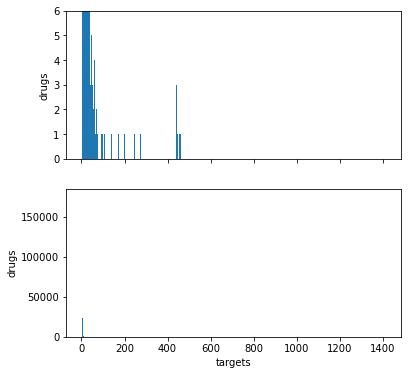

In [6]:
def bindingdb_hist(vc):
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(6, 6))
    for axi in ax:
        vc.hist(bins=vc.max() + 1, ax=axi)
        axi.grid(False)
        axi.set_ylabel('drugs')
    ax[0].set_ylim(0, 6)
    ax[1].set_xlabel('targets')
    return((fig, ax))

fig, ax = bindingdb_hist(vc_bdb)
attila_utils.savefig(fig, 'bindingdb-targets-hist')

The histogram has so many bins $\approx 1400$ that matplotlib cannot even render the above figure correctly.

The figure below shows only the first $200$ bins.

['named-figure/bindingdb-targets-hist-left.png',
 'named-figure/bindingdb-targets-hist-left.pdf']

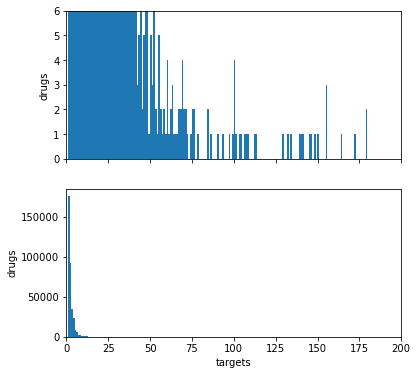

In [7]:
fig, ax = bindingdb_hist(vc_bdb)
ax[0].set_xlim(0, 200)
attila_utils.savefig(fig, 'bindingdb-targets-hist-left')

The next figure shows the *last* $\approx 200$ bins.

['named-figure/bindingdb-targets-right.png',
 'named-figure/bindingdb-targets-right.pdf']

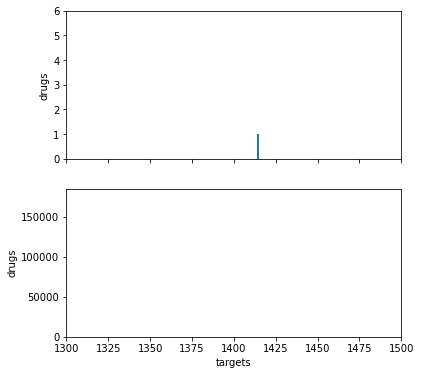

In [8]:
fig, ax = bindingdb_hist(vc_bdb)
ax[0].set_xlim(1300, 1500)
attila_utils.savefig(fig, 'bindingdb-targets-right')

## Number of targets: DrugBank

In [9]:
fpath = '../../resources/UniChem/chembl2drugbank.tsv'
db2chembl = pd.read_csv(fpath, sep='\t', header=0, names=['chembl_id', 'drugbank_id'])#['chembl_id']
#db2chembl = pd.read_csv(fpath, sep='\t', header=0, names=['chembl_id', 'drugbank_id'], index_col='drugbank_id')#['chembl_id']
db2chembl.head()

,chembl_id,drugbank_id
0,CHEMBL1185242,DB06994
1,CHEMBL1201270,DB06799
2,CHEMBL522,DB02464
3,CHEMBL3989948,DB14814
4,CHEMBL313405,DB07337


In [10]:
fpath = '../../results/2021-08-11-drugbank/drugbank-filtered-proteins.csv'
drugbank = pd.read_csv(fpath)
#drugbank = pd.read_csv(fpath, index_col=['drugbank_id', 'uniprot_id'])
#drugbank['drugbank_id'] = drugbank.index.get_level_values(0)
#drugbank.head()

We read a subset of drugbank, see [2021-08-11-drugbank](https://github.com/attilagk/CTNS-notebook/blob/main/2021-08-11-drugbank/2021-08-11-drugbank.ipynb).  The subset contains only those drugs whose targets fulfill all below (see filter_drugbank_proteins function):

* are human proteins
* are targets of small molecules
* possess a HGNC ID

In [11]:
drugbank = pd.merge(drugbank, db2chembl, on='drugbank_id', how='left')
drugbank

,drugbank_id,uniprot_id,symbol,name,category,organism,known_action,actions,hgnc_id,group,entrez_id,chembl_id
0,DB00006,P00734,F2,Prothrombin,target,Humans,yes,inhibitor,HGNC:3535,approved,2147,CHEMBL2103749
1,DB00007,P30968,GNRHR,Gonadotropin-releasing hormone receptor,target,Humans,yes,agonist,HGNC:4421,approved,2798,CHEMBL1201199
2,DB00014,P22888,LHCGR,Lutropin-choriogonadotropic hormone receptor,target,Humans,yes,agonist,HGNC:6585,approved,3973,CHEMBL1201247
3,DB00014,P30968,GNRHR,Gonadotropin-releasing hormone receptor,target,Humans,yes,agonist,HGNC:4421,approved,2798,CHEMBL1201247
4,DB00035,P30518,AVPR2,Vasopressin V2 receptor,target,Humans,yes,agonist,HGNC:897,approved,554,CHEMBL1429
...,...,...,...,...,...,...,...,...,...,...,...,...
12994,DB15822,P21802,FGFR2,Fibroblast growth factor receptor 2,target,Humans,unknown,inhibitor,HGNC:3689,approved,2263,CHEMBL4297597
12995,DB15873,P30874,SSTR2,Somatostatin receptor type 2,target,Humans,yes,binder,HGNC:11331,approved,6752,NaN
12996,DB15982,P03952,KLKB1,Plasma kallikrein,target,Humans,yes,inhibitor,HGNC:6371,approved,3818,NaN
12997,DB16019,P07288,KLK3,Prostate-specific antigen,target,Humans,yes,binder,HGNC:6364,approved,354,NaN


In [12]:
ndrugs_drugbank = drugbank.drugbank_id.describe().loc['unique']
print('{} drugs in this subset of DrugBank'.format(ndrugs_drugbank))

5262 drugs in this subset of DrugBank


ChEMBL ID provides a link between DrugBank an BindingDB.  However, not all drugs in DrugBank have a ChEMBL ID (yet).

In [13]:
ndrugs_drugbank_wo_chemblid = drugbank.groupby('drugbank_id').first()['chembl_id'].isnull().sum()
ndrugs_drugbank_w_chemblid = ndrugs_drugbank - ndrugs_drugbank_wo_chemblid
print('{} drugs with ChEMBL ID'.format(ndrugs_drugbank_w_chemblid))

3669 drugs with ChEMBL ID


Below is the number of targets for 

In [14]:
vc_drugbank = drugbank.value_counts('chembl_id') # gives the same result as drugbank.value_counts('chembl_id')
entries = pd.concat([vc_drugbank.to_frame('targets in drugbank'), vc_bdb.to_frame('targets in bindingdb')], axis=1).fillna(0)
entries = entries.astype(np.int64)

In [15]:
ndrugs_drugbank_in_bindingdb = sum((entries['targets in drugbank'] >= 1) & (entries['targets in bindingdb'] >= 1))
print('{} drugs in both DrugBank and BindingDB'.format(ndrugs_drugbank_in_bindingdb))

404 drugs in both DrugBank and BindingDB


In [16]:
vc_drugbank

chembl_id
CHEMBL2103830    295
CHEMBL1201279    123
CHEMBL1200928    123
CHEMBL1200679     97
CHEMBL25164       80
                ... 
CHEMBL217068       1
CHEMBL2178422      1
CHEMBL2178578      1
CHEMBL217914       1
CHEMBL256315       1
Length: 3669, dtype: int64

['named-figure/drugbank-targets-hist.png',
 'named-figure/drugbank-targets-hist.pdf']

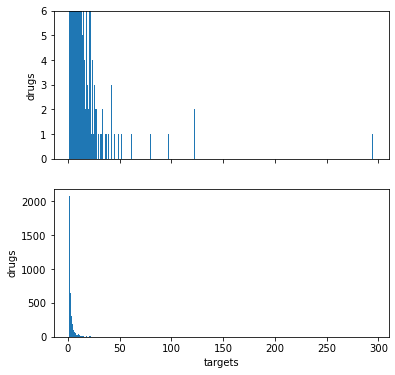

In [17]:
fig, ax = bindingdb_hist(vc_drugbank)
attila_utils.savefig(fig, 'drugbank-targets-hist')

## Few drugs shared by DrugBank and BindingDB

This means that we cannot use BindingDB to filter DrugBank for high affinity drug-target pairs.

Text(0.5, 1.0, 'DrugBank drugs')

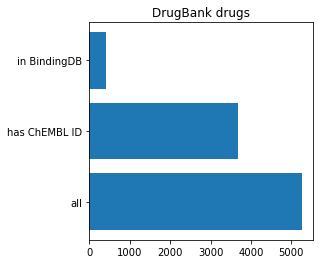

In [18]:
fig, ax = plt.subplots(figsize=(4, 4))
#ndrugs = [ndrugs_drugbank, ndrugs_drugbank_w_chemblid, ndrugs_drugbank_in_bindingdb]
ndrugs = {'all': ndrugs_drugbank, 'has ChEMBL ID': ndrugs_drugbank_w_chemblid, 'in BindingDB': ndrugs_drugbank_in_bindingdb}
ticks = np.arange(len(ndrugs))
ax.barh(y=ticks, width=ndrugs.values())
ax.set_yticks(ticks)
ax.set_yticklabels(ndrugs.keys())
ax.set_title('DrugBank drugs')

## Number of targets: DrugBank vs BindingDB

['named-figure/targets-in-bindingdb-vs-drugbank.png',
 'named-figure/targets-in-bindingdb-vs-drugbank.pdf']

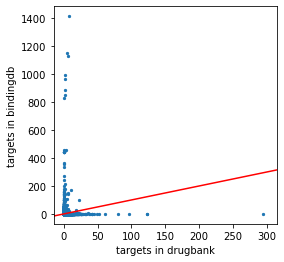

In [19]:
def plot_entries(entries):
    fig, ax = plt.subplots(figsize=(4, 4))
    entries.plot(kind='scatter', x='targets in drugbank', y='targets in bindingdb', marker='.', ax=ax)
    ax.axline((0, 0), (300, 300), color='red')
    return((fig, ax))

fig, ax = plot_entries(entries)
attila_utils.savefig(fig, 'targets-in-bindingdb-vs-drugbank')

['named-figure/targets-in-bindingdb-vs-drugbank-zoom.png',
 'named-figure/targets-in-bindingdb-vs-drugbank-zoom.pdf']

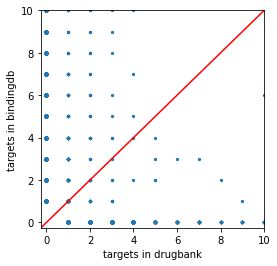

In [20]:
rightlim = 10
leftlim = - rightlim * 0.025
fig, ax = plot_entries(entries)
ax.set_xlim(leftlim, rightlim)
ax.set_ylim(leftlim, rightlim)
attila_utils.savefig(fig, 'targets-in-bindingdb-vs-drugbank-zoom')

In [21]:
%connect_info

{
  "shell_port": 61489,
  "iopub_port": 61490,
  "stdin_port": 61491,
  "control_port": 61493,
  "hb_port": 61492,
  "ip": "127.0.0.1",
  "key": "b6d0be8c-7d042ac7c539271bdc1bb1a8",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-8a1d2fcb-b190-4f33-ac33-83b30f891698.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.
